1. Data Description
There are 2 datasets, players.csv and sessions.csv. Players.csv contains 196 players separated by their self-reported experience on a scale of Pro, Amateur, Veteran, and Regular,  if they are subscribed to a game-related newsletter or not – represented as a logical value, their encrypted email address, their hours played, and their name, gender, and age, each separated into its own column. Sessions.csv contains information about each session of play per player, containing data about 1535 sessions. It includes 5 columns; encrypted user email, start and end times, and original start and end times, with the original times showcasing times relative to the server. Upon wrangling this data, we have discovered that the average age across all registered players is 21 years old; however, the average age of all players who have had a session (played for any given time in the server after registering), was 22 years of age. Among all players who have played a session, the average sessions per player was 12 and the average hours played was 9 hours.

2. Questions
The broad question I am looking to answer is knowing what “kinds” of players are most likely to contribute to a large amount of data (Question 2). The specific question I am asking is if can we use age to predict the amount of playtime a user will have in the player’s data set? To address this question, I will combine the players and sessions data sets and categorize by age groups to plot a relationship between Age vs. Hours played and Age vs. Sessions.

3. See below

4. Methods and Plan
To address my specific question aforementioned in question 2, I am planning performing a multiple linear regression using age and total sessions to predict total playtime. Some assumptions I will have to make is that I am working witha linear mean, and that there is no multicollinearity. I am choosing to use a linear regression model vs. a KNN regression model because the relationship between all 3 variables can be more easily interpreted; however, I would be inclined to switch to a k-nearest neighbours regression if plots suggest a non-linear relationship.  Multicollinearity may exist, which would make it harder for me to hone in on the effect of age. There could also be a lack of linearity, as the dataset includes young age groups which may have restrictions imposed on playtime by their parents or guardians.  I will filter out players who have registered but not played a single sessions as these outliers will skew the data. I will then split the data into training and testing splits, and use a 5-fold cross-validation after fitting a model. After all these steps are completed, I will look to visualize the data for an easy interpretation. Once again, if non-linearity or collinearity are suggested, I will either isolate the predictors or switch to a KNN regression model.

5. Link: https://github.com/Rdlt/dsci100-individual-planning




In [57]:
library(tidyverse)

In [58]:
players <- read_csv("data/players.csv") 
#196 rows, 7 columns
sessions <- read_csv("data/sessions.csv") 
#1535 rows, 5 columns
players
sessions


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [59]:
players_tidy <- players |>
    mutate (
        Age = as.numeric(Age),
        played_hours = as.numeric(played_hours),
        subscribe = as.logical(subscribe),
        experience = as.factor (experience),
        gender = as.factor(gender)
        )

sessions_tidy <- sessions |>
    separate(start_time, into = c("start_date", "start_clock"), sep = " ", remove = FALSE) |>
    separate (end_time, into = c("end_date", "end_clock"), sep = " ", remove = FALSE) |>
    mutate(
        start_hour = as.numeric (substr(start_clock, 1, 2)),
        end_hour = as.numeric (substr(end_clock, 1, 2))
        )
sessions_tidy <- sessions_tidy |>
    mutate (duration_hours = end_hour - start_hour)

invisible(players_tidy)
invisible(sessions_tidy)
                                

In [60]:
full_data <- left_join(sessions_tidy, players_tidy, by = "hashedEmail")
invisible(full_data)

In [61]:
tidy_full <- full_data |>
    group_by (hashedEmail, experience, gender, Age, subscribe, played_hours) |>
    summarise (
        total_sessions = n(),
)
tidy_full

`summarise()` has grouped output by 'hashedEmail', 'experience', 'gender',
'Age', 'subscribe'. You can override using the `.groups` argument.


hashedEmail,experience,gender,Age,subscribe,played_hours,total_sessions
<chr>,<fct>,<fct>,<dbl>,<lgl>,<dbl>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,Male,20,TRUE,1.5,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,Male,21,FALSE,0.4,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,Male,17,TRUE,0.1,1
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,Male,17,TRUE,5.6,13
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,Pro,Male,17,TRUE,1.0,2
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,Veteran,Male,19,FALSE,0.1,1
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,Amateur,Female,21,TRUE,0.7,1
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,Amateur,Male,14,TRUE,17.2,41
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,Beginner,Female,37,FALSE,0.2,1


In [21]:
write_csv(full_data, "data/full_data_clean.csv")
write_csv(tidy_full, "data/tidy_player_full.csv")

In [76]:
grouped_age <- tidy_full |>
    mutate(age_group = cut (Age,
                            breaks = c(0, 11, 18, 25, 31, 41, 100),
                            labels = c("0-10", "11-17", "19-24", "25-30", "31-40", "41-100"))) |>

group_by (age_group) |>
    mutate(total_hours_by_group = sum(played_hours, na.rm = TRUE)) |>
ungroup()

grouped_age

                            

hashedEmail,experience,gender,Age,subscribe,played_hours,total_sessions,age_group,total_hours_by_group
<chr>,<fct>,<fct>,<dbl>,<lgl>,<dbl>,<int>,<fct>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,Male,20,TRUE,1.5,2,19-24,543.9
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,Male,21,FALSE,0.4,1,19-24,543.9
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,Male,17,TRUE,0.1,1,11-17,526.5
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,Male,17,TRUE,5.6,13,11-17,526.5
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,Pro,Male,17,TRUE,1.0,2,11-17,526.5
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,Veteran,Male,19,FALSE,0.1,1,19-24,543.9
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,Amateur,Female,21,TRUE,0.7,1,19-24,543.9
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,Amateur,Male,14,TRUE,17.2,41,11-17,526.5
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,Beginner,Female,37,FALSE,0.2,1,31-40,2.3


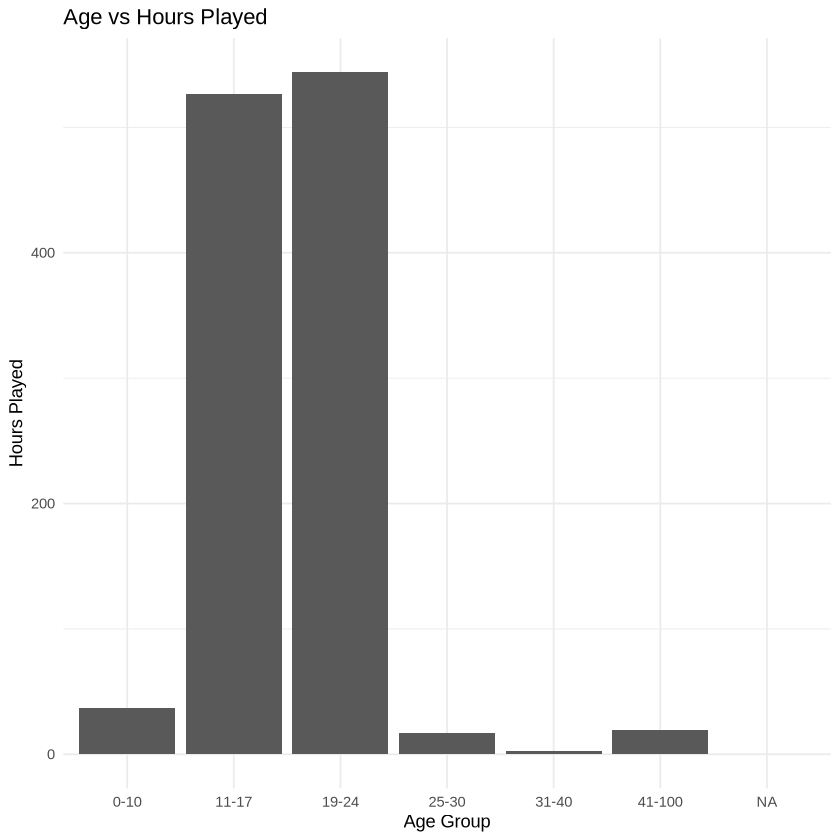

In [77]:


players_plot_anh <- age_hours|>
    ggplot(aes (x = age_group, y = total_hours)) +
    geom_col() +
    labs(
        title = "Age vs Hours Played",
        x = "Age Group",
        y = "Hours Played"
        ) +
    theme_minimal()
players_plot_anh

In [78]:
age_sessions <- grouped_age |>
    group_by(age_group) |>
    summarize (total_sessions = sum(total_sessions))
age_sessions

age_group,total_sessions
<fct>,<int>
0-10,37
11-17,732
19-24,712
25-30,26
31-40,4
41-100,22
NA,2


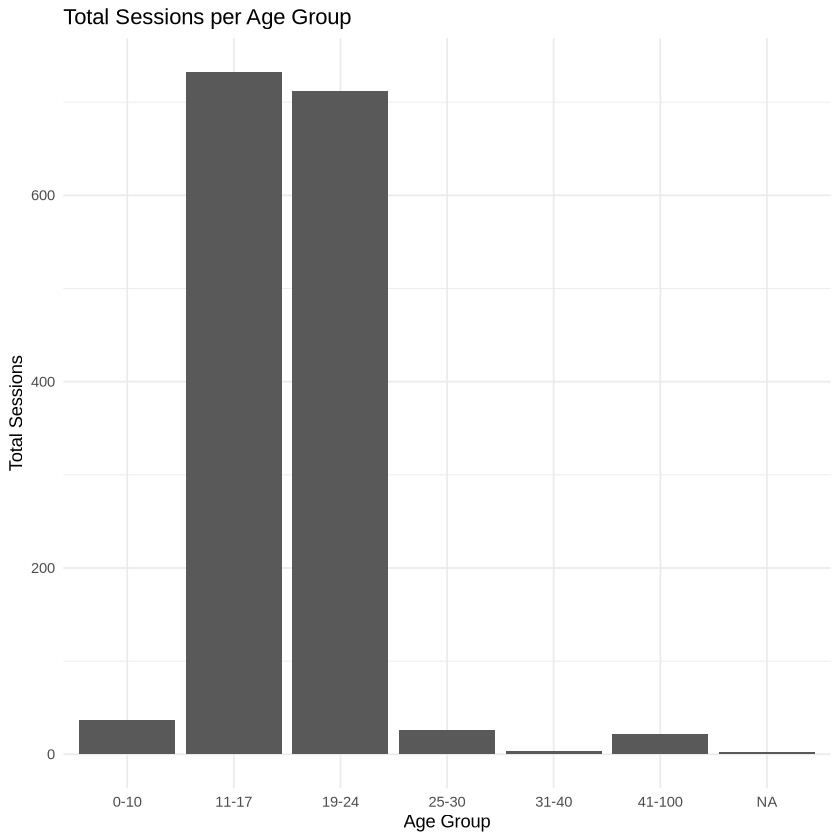

In [80]:
age_sessions_bar <- age_sessions |>
    ggplot (aes(x = age_group, y = total_sessions)) +
    geom_col() +
    labs (
        title = "Total Sessions per Age Group",
        x = "Age Group",
        y = "Total Sessions") +
    theme_minimal()
age_sessions_bar

In [11]:
summary(grouped_age_players)

    experience subscribe       hashedEmail         played_hours    
 Amateur :63   Mode :logical   Length:196         Min.   :  0.000  
 Beginner:35   FALSE:52        Class :character   1st Qu.:  0.000  
 Pro     :14   TRUE :144       Mode  :character   Median :  0.100  
 Regular :36                                      Mean   :  5.846  
 Veteran :48                                      3rd Qu.:  0.600  
                                                  Max.   :223.100  
                                                                   
     name                         gender         Age         age_group 
 Length:196         Agender          :  2   Min.   : 9.00   0-10  : 3  
 Class :character   Female           : 37   1st Qu.:17.00   11-17 :88  
 Mode  :character   Male             :124   Median :19.00   19-24 :80  
                    Non-binary       : 15   Mean   :21.14   25-30 : 9  
                    Other            :  1   3rd Qu.:22.75   31-40 : 5  
                    Pref

In [82]:
round(mean(players$Age, na.rm = TRUE), 0)



[1] 21

In [83]:
round(mean(grouped_age$Age, na.rm = TRUE), 0)
round(mean(grouped_age$total_sessions, na.rm = TRUE), 0)
round(mean(grouped_age$played_hours, na.rm = TRUE), 0)

[1] 22

[1] 12

[1] 9

In [28]:
summary(grouped_age)

 hashedEmail           experience               gender        Age       
 Length:125         Amateur :42   Agender          : 1   Min.   : 9.00  
 Class :character   Beginner:22   Female           :24   1st Qu.:17.00  
 Mode  :character   Pro     :11   Male             :83   Median :19.00  
                    Regular :23   Non-binary       : 6   Mean   :21.59  
                    Veteran :27   Other            : 1   3rd Qu.:23.00  
                                  Prefer not to say: 6   Max.   :58.00  
                                  Two-Spirited     : 4   NA's   :2      
 subscribe       total_sessions    age_group 
 Mode :logical   Min.   :  1.00   0-10  : 3  
 FALSE:32        1st Qu.:  1.00   11-17 :55  
 TRUE :93        Median :  1.00   19-24 :46  
                 Mean   : 12.28   25-30 : 8  
                 3rd Qu.:  2.00   31-40 : 4  
                 Max.   :310.00   41-100: 7  
                                  NA's  : 2  